In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency

In [3]:
loan_data=pd.read_csv('loan_data_2007_2014.csv')  

c:\Users\user\anaconda3\include\cpython\envs\tf-gpu-cuda11\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
loan_data.head(4)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
#get list of columns with more than 80% of null values
na_values= loan_data.isnull().mean()
na_values[na_values>0.8]

mths_since_last_record       0.865666
annual_inc_joint             1.000000
dti_joint                    1.000000
verification_status_joint    1.000000
open_acc_6m                  1.000000
open_il_6m                   1.000000
open_il_12m                  1.000000
open_il_24m                  1.000000
mths_since_rcnt_il           1.000000
total_bal_il                 1.000000
il_util                      1.000000
open_rv_12m                  1.000000
open_rv_24m                  1.000000
max_bal_bc                   1.000000
all_util                     1.000000
inq_fi                       1.000000
total_cu_tl                  1.000000
inq_last_12m                 1.000000
dtype: float64

In [7]:
loan_data.dropna(thresh=loan_data.shape[0]*0.2,how='all',axis=1,inplace=True)

In [8]:
loan_data.head(4)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [9]:
loan_data.drop(columns=['id','member_id','sub_grade','emp_title','url','desc','title','zip_code','next_pymnt_d','recoveries','collection_recovery_fee','total_rec_prncp','total_rec_late_fee'],inplace=True)

In [10]:
loan_data.shape

(466285, 44)

In [11]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   funded_amnt                  466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   term                         466285 non-null  object 
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

In [12]:
loan_data['loan_status'].value_counts(normalize=True)

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [13]:
loan_data['good_bad']=np.where(loan_data.loc[:,'loan_status'].isin(['Charged Off','Default','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']),0,1)

In [14]:
loan_data.drop(columns=['loan_status'],inplace=True)

In [15]:
loan_data['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

In [16]:
loan_data.head(4)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
0,0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1
1,1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,...,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
2,2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1
3,3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,...,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1


In [17]:
X=loan_data.drop('good_bad',axis=1)
y=loan_data['good_bad']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test= X_train.copy(), X_test.copy()

In [18]:
loan_data['emp_length'].value_counts()

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

In [19]:
def emp_length_converter(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)
emp_length_converter(X_train, 'emp_length')


<ipython-input-19-68f6b0227555>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


In [20]:
X_train['emp_length'].unique()

array([ 7., 10.,  3.,  4.,  2.,  0.,  1.,  6.,  5.,  8.,  9.])

In [21]:
def date_column(df,column):
    today_date = pd.to_datetime('2020-08-01')
    df[column]=pd.to_datetime(df[column],format="%b-%y")
    df['mths_since_'+column]=round(pd.to_numeric((today_date-df[column])/np.timedelta64(1,'M')))
    df['mths_since_'+column]=df['mths_since_'+column].apply(lambda x: df['mths_since_'+column].max() if x<0 else x)
    df.drop(columns=[column],inplace=True)

In [22]:
date_column(X_train, 'earliest_cr_line')
date_column(X_train, 'issue_d')
date_column(X_train, 'last_pymnt_d')
date_column(X_train, 'last_credit_pull_d')

In [23]:
print(X_train['mths_since_earliest_cr_line'].describe())
print(X_train['mths_since_issue_d'].describe())
print(X_train['mths_since_last_pymnt_d'].describe())
print(X_train['mths_since_last_credit_pull_d'].describe())

count    373003.000000
mean        274.293609
std          86.372742
min         105.000000
25%         215.000000
50%         257.000000
75%         317.000000
max         619.000000
Name: mths_since_earliest_cr_line, dtype: float64
count    373028.000000
mean         83.252485
std          14.339074
min          68.000000
25%          73.000000
50%          79.000000
75%          89.000000
max         158.000000
Name: mths_since_issue_d, dtype: float64
count    372717.000000
mean         63.289989
std          12.803859
min          55.000000
25%          55.000000
50%          56.000000
75%          67.000000
max         152.000000
Name: mths_since_last_pymnt_d, dtype: float64
count    372998.000000
mean         59.041810
std           9.630887
min          55.000000
25%          55.000000
50%          55.000000
75%          57.000000
max         159.000000
Name: mths_since_last_credit_pull_d, dtype: float64


In [24]:
def loan_term_converter(df,column):
    df[column]=pd.to_numeric(df[column].str.replace(' months',''))
    
loan_term_converter(X_train,'term')

In [25]:
#feature selection
X_train_cat=X_train.select_dtypes(include='object').copy()
X_train_num=X_train.select_dtypes(include='number').copy()

In [29]:
chi2_check={}
for column in X_train_cat:
    chi,p,dof,ex=chi2_contingency(pd.crosstab(y_train,X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10 ))
    
chi2_result=pd.DataFrame(data=chi2_check)
chi2_result.sort_values(by=['p-value'],ascending=True,ignore_index=True,inplace=True)
chi2_result

,Feature,p-value
0,grade,0.000000
1,home_ownership,0.000000
2,verification_status,0.000000
3,purpose,0.000000
4,addr_state,0.000000
5,initial_list_status,0.000000
6,pymnt_plan,0.000923
7,application_type,1.000000


In [32]:
X_train_num.fillna(X_train_num.mean(),inplace=True)
F_statistic, p_values=f_classif(X_train_num,y_train)
ANOVA_F_table=pd.DataFrame(data={'Numerical_Feature':X_train_num.columns.values, 'F-score':F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by=['F-score'],ascending=False,ignore_index=True, inplace=True)
ANOVA_F_table

c:\Users\user\anaconda3\include\cpython\envs\tf-gpu-cuda11\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\Users\user\anaconda3\include\cpython\envs\tf-gpu-cuda11\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Numerical_Feature,F-score,p values
0,mths_since_last_pymnt_d,23513.805570,0.000000e+00
1,total_pymnt_inv,14784.534040,0.000000e+00
2,total_pymnt,14686.729567,0.000000e+00
3,int_rate,11462.788313,0.000000e+00
4,last_pymnt_amnt,10826.949727,0.000000e+00
5,out_prncp,9635.116160,0.000000e+00
6,out_prncp_inv,9633.442129,0.000000e+00
7,mths_since_last_credit_pull_d,7020.218888,0.000000e+00
8,mths_since_issue_d,2816.028871,0.000000e+00
9,inq_last_6mths,2003.820465,0.000000e+00


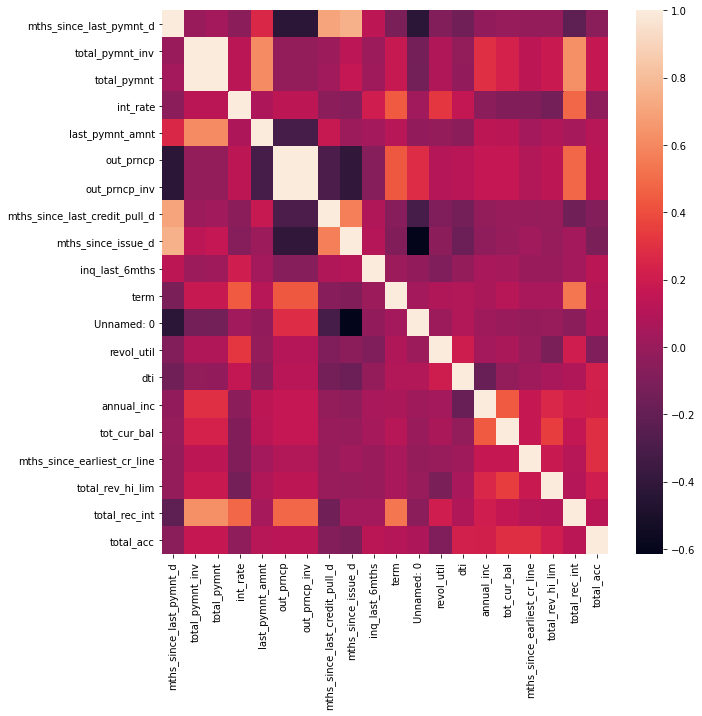

In [38]:
top_num_features=ANOVA_F_table.iloc[:20,0].to_list()
corrmat= X_train_num[top_num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);